
# Machine Learning 2019/2020 - Challenge 2 - 16 December 2019

## Rules (read carefully):
- This year the results of the two challenges will count 10% and 15% respectively of your final score.
- If you work with a group of colleges (max 3 students), please remember your solution must be <b>"your solution"</b>, hence provide your individual answers/arguments/opinions/critics;
- Students of the same group can share <b>ONLY</b> the code.
- Mail your solution (a <b>jupyter notebook</b>) only to stefano.faralli@unitelmasapienza.it before the 1:59 PM of the 19 December 2019 (Rome Berlin time);
- The subject of your email must be: "[Challenge_2_solution] NAME - SURNAME - MATRICOLA."
- Double check the subject of your email and the attachments;
- In case you want to compress the attachment, <b>USE ONLY STANDARD ZIP compression</b>;
- <b>Please sumbit ONLY the notebook with SAVED OUTPUTS!</b>
- The physical attendance to the lab is not mandatory, you can work from a remote place by following the identical rules.
- Your solution might be considered as the "copy" of others solutions, in that specific case the assigned score will be the result of the proposed solution divided by the number of "too much similar" solutions. If you share the code with the components of your "group" please comment the code and answer the questions by yourself.

- Monday 16 December, I will share the necessary key to unzip the content of the provided challenge material (I will also send a message on the Google group).
- To unzip the content of the zip you will use the above key
- Then read carefully all the part of the jupyter notebook and fill all mandatory fields.
- <b>Don't write "personal" emails</b> to Stefano Faralli, but please <b>use the google group</b> I will reply until 12 AM of 17 December 2019 <b>(strict deadline)</b>. 
- <b>solutions (and correspondig points) are evaluated mainly on your thoughts/comments/opinions</b> hence, please use the provided corresponding "YOUR COMMENTS" cell</b> 



## Identification (Mandatory)

In [1]:
# Identification
# assign the following string values
yourNameSurname='andreabac3'
yourMatricolaNumber='andreabac3'
yourStudentEMAIL='andreabac3'
yourColleguesNameSurnames=['andreabac3','andreabac3']

# Lego Bricks Visual Classification
<img src="45020_Prod_03.jpg"/>

## Description of the task:
<br>
devolop a classifier able to classify with a <b>weighted avg F1 score greater than 0.60</b> pictures of Lego bricks taken at different angles.
Use Keras and scikit-learn to develop, train and evaluate a CNN with:<br>
- Convolutional and Pooling operations<br>  
- a dense sub network at the end <br>


## Part 1 -  Dataset (max 6/30)

# Import 

In [2]:
# Standard lib
from os import sep
import math
import warnings

warnings.filterwarnings('ignore')

# Third party import
import matplotlib.pyplot as plt
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D, Dense, Flatten, Dropout, \
    BatchNormalization
from keras import backend as K, Sequential
from tensorflow.python.keras.saving import model_from_json
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np


Using TensorFlow backend.


# Constant

In [3]:
# Constant
STORED, STORED_model = False, False
DATASET_PATH = "dataset"
BATCH_SIZE = 32
GRAYSCALE = 'grayscale'
DIM_IMG = 64
SEED = 0
EPOCHS = 25
history, model = None, None

### Part 1-a  - Load the dataset (3/6 pts)
The provided dataset is composed by pictures of Lego bricks, taken at different angles:<br>
As an example the following picture:<br>
<img src="dataset/train/2357 Brick corner 1x2x2/201706171206-0001.png"/> 
corresponds to the png file in "dataset/train/2357 Brick corner 1x2x2/201706171206-0001.png"
- "201706171206-0001.png" is the name of the file;
- "2357 Brick corner 1x2x2" is the label of the Lego brick type;
- "train" means that this is the portion of the dataset you must use for the training
Inside the folder <b>dataset</b> you can find another subfolder <b>validatetest</b>.
The content inside of <b>validatetest</b> must be used (after a proper split) for validation during training and for testing during the evaluation.


Load the dataset and create: 
- X_train, y_train from the content in "dataset/train/"
- X_validate,y_validate,X_test,y_test as a split (20% for validation and 80% for test) of the content in "dataset/validatetest/"

<b>Tips:</b>
- you can use CV2 or matplotlib to load pictures
- check the file you are loading is ending with ".png"


In [4]:
# CODE OF PART 1 - "Load the Dataset"
# CODE OF PART 1 - "Dataset  preprocessing"

train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator(validation_split=0.2)

training_set = train_datagen.flow_from_directory(DATASET_PATH + sep + "train" + sep,
                                                 target_size=(DIM_IMG, DIM_IMG),
                                                 batch_size=BATCH_SIZE,
                                                 color_mode=GRAYSCALE,
                                                 seed=SEED
                                                 )

valid_set = test_datagen.flow_from_directory(DATASET_PATH + sep + "validationandtest" + sep,
                                             target_size=(DIM_IMG, DIM_IMG),
                                             batch_size=BATCH_SIZE,
                                             color_mode=GRAYSCALE,
                                             subset='validation',
                                             seed=SEED
                                             )

test_set = test_datagen.flow_from_directory(DATASET_PATH + sep + "validationandtest" + sep,
                                            target_size=(DIM_IMG, DIM_IMG),
                                            batch_size=BATCH_SIZE,
                                            color_mode=GRAYSCALE,
                                            subset='training',
                                            seed=SEED,
                                            shuffle=False
                                            )

n_training_files = len(training_set.filenames)
n_valid_files = len(valid_set.filenames)
n_test_files = len(test_set.filenames)

Found 6379 images belonging to 16 classes.
Found 1275 images belonging to 16 classes.
Found 5104 images belonging to 16 classes.


# your comments: 

In [5]:
# text of your comments here!

# Comments:
I used a function in the Keras library to load images, change the color channel switch from rgb to grayscale and set the dimension from 200x200 to 64x64. This function uses directory names to assign it a class of membership.
Allows you to split the dataset into portions. As you can see from the line:
test_datagen = ImageDataGenerator (validation_split = 0.2)
I have created two subset in order to split the test set into test_set (80%) and valid_set (20%)

### Part 1-b Dataset  preprocessing (3/6 pts max)
Since you are using the dataset for a classification task using Keras API you will need to perform some dataset tranformations:<br>
1) tranform all the images into grayscale having a final shape of (dim,dim,1)  dim<200;<br>
<img src="info.png">
2) encode properly the target features for train, test and validation<br>

<b>Tips:</b>
- you can use CV2 and numpy to tranform and reshape the pictures


In [6]:
def n_f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.
        Only computes a batch-wise average of recall.
        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.
        Only computes a batch-wise average of precision.
        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

# your comments:

## Part 2 - Training (max 12 pts)
## Part 2.a - create and train a  working CNN (10/10 pts)
use Keras: with Convolutional and Pooling operations and a dense sub network at the end, use properly the preprocessed portions of the dataset (train and validation) and apply scaling.

## Part 2.b -  save the learned model (2/10 pts)
save the model to a file

In [7]:
if not STORED_model:
    model = Sequential()

    model.add(Conv2D(32, kernel_size=3, input_shape=(DIM_IMG, DIM_IMG, 1), activation='relu', padding="same"))
    model.add(BatchNormalization())
    # model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=16, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', n_f1])
    history = model.fit_generator(training_set,
                                  steps_per_epoch=n_training_files / BATCH_SIZE,
                                  epochs=EPOCHS,
                                  validation_data=valid_set,
                                  validation_steps=n_valid_files / BATCH_SIZE)


Epoch 1/25
200/199 [==============================] - 10s 51ms/step - loss: 2.4201 - accuracy: 0.6062 - n_f1: 0.6159 - val_loss: 1.1420 - val_accuracy: 0.8008 - val_n_f1: 0.7978
Epoch 2/25
200/199 [==============================] - 7s 33ms/step - loss: 0.4784 - accuracy: 0.8312 - n_f1: 0.8346 - val_loss: 0.4066 - val_accuracy: 0.8722 - val_n_f1: 0.8721
Epoch 3/25
200/199 [==============================] - 6s 32ms/step - loss: 0.2650 - accuracy: 0.8975 - n_f1: 0.8992 - val_loss: 0.1029 - val_accuracy: 0.9169 - val_n_f1: 0.9112
Epoch 4/25
200/199 [==============================] - 7s 33ms/step - loss: 0.1456 - accuracy: 0.9381 - n_f1: 0.9406 - val_loss: 0.1032 - val_accuracy: 0.9349 - val_n_f1: 0.9383
Epoch 5/25
200/199 [==============================] - 6s 32ms/step - loss: 0.1089 - accuracy: 0.9536 - n_f1: 0.9551 - val_loss: 0.1049 - val_accuracy: 0.9522 - val_n_f1: 0.9531
Epoch 6/25
200/199 [==============================] - 7s 34ms/step - loss: 0.1510 - accuracy: 0.9497 - n_f1: 0.95

In [8]:
#code for Part 2 - Training
if not STORED_model:
    # serialize model to JSON
    model_json = model.to_json()
    with open("model.json", "w") as json_file:
        json_file.write(model_json)
        # serialize weights to HDF5
        model.save_weights("model_epochs_" + str(EPOCHS) + ".h5")
        print("Saved model to disk")
else:
    # load json and create model
    with open("model.json", "r") as json_file:
        loaded_model_json = json_file.read()
    model = model_from_json(loaded_model_json)
    # load weights into new model
    model.load_weights("model_epochs_" + str(EPOCHS) + ".h5")
    print("Loaded model from disk")
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', n_f1])

Saved model to disk


In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
flatten_1 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16777344  
_________________________________________________________________
dense_2 (Dense)              (None, 16)                2064      
Total params: 16,779,856
Trainable params: 16,779,792
Non-trainable params: 64
_________________________________________________________________


The function model.summary() show you the structure and the number of parameters of the Net.

# your comments:

In this section I created the network structure and executed the model train phase.

I used a batch size of 32 and 25 epochs.

The network is composed of a single convolutional layer, which uses different 3x3 kernels and padding.
I have not performed max pooling operations.

I ran the batch normalization in order to rescale the outputs.

I used the flatten() "layer" to flatten the features.

And then two dense layers, the last with the activation function softmax and 16 units to predict output (16 classes).

I used tensorflow-gpu on my GTX 1070 to optimize train times.

The second block of code saves the network structure in a .json file and saves the weights in a .h5 format

If the variable STORED_model == True then the weights and structure of the saved network are restored. Otherwise, new files are generated.

# Part 3 - Evaluation (max 10 pts)
## Part 3.a - Test (max 8/10 pts)
- use the classifier built during Part 2, to classify the lego brick label of each picture of your Test dataset portion.
- print the classifcation report

## Part 3.b - minal f1 requirement (max 2/10 pts)
- if from the report (in part 3.a) you printed, the weighted avg F1 is greater than 0.60 you get 1 point
- if from the report (in part 3.a) you printed, the weighted avg F1 is greater than 0.70 you get 1 point
- if from the report you printed in part 3.a the weighted avg F1 is less or equal to 0.60 you get -2 points

In [10]:
#code for  part 3
test_loss, accuracy, f1 = model.evaluate(test_set, steps=math.ceil(n_test_files / BATCH_SIZE))
print('F1 on test dataset:', f1)
print('Accuracy on test dataset:', accuracy)

160/160 [==============================] - 5s 34ms/step
F1 on test dataset: 0.9992157220840454
Accuracy on test dataset: 0.9994122385978699


In [11]:
predictions = model.predict_generator(test_set)

In [12]:
predictions = model.predict_generator(test_set)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())
print("F1 weighted: " , f1_score(true_classes, predicted_classes, average='weighted'))
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

F1 weighted:  0.9994122228398009
                                        precision    recall  f1-score   support

11214 Bush 3M friction with Cross axle       1.00      1.00      1.00       320
18651 Cross Axle 2M with Snap friction       1.00      1.00      1.00       320
               2357 Brick corner 1x2x2       1.00      1.00      1.00       304
                        3003 Brick 2x2       1.00      1.00      1.00       320
                        3004 Brick 1x2       1.00      1.00      1.00       320
                        3005 Brick 1x1       1.00      1.00      1.00       320
                        3022 Plate 2x2       1.00      1.00      1.00       320
                        3023 Plate 1x2       1.00      0.99      1.00       320
                        3024 Plate 1x1       1.00      1.00      1.00       320
              3040 Roof Tile 1x2x45deg       1.00      1.00      1.00       320
                    3069 Flat Tile 1x2       1.00      1.00      1.00       320
      

dict_keys(['val_loss', 'val_accuracy', 'val_n_f1', 'loss', 'accuracy', 'n_f1'])


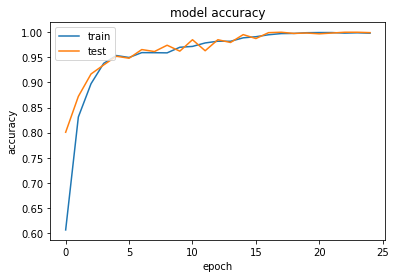

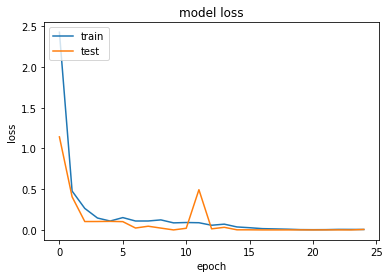

In [13]:
def print_plot(history):
    if history == None:
        return
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

print_plot(history)

# your comments:

The result of the evaluation is 99.9% of the F1 Weighted score. 
F1 weighted:  0.9994122228398009

As you can see from the plot, the loss is immediately very low.

I used the sklearn library to show the classification report and as we can see the f1, precision and recall get exactly 1 as a result.


# Part 4 - Feature importance (max 2/30 pts)
## Part 4.a perform a pixel based feature importance analysis on the validation portion of the dataset (1 pts)
## Part 4.b plot the corresponding heatmap of pixel importance (1 pts)



In [14]:
def extract_from_batches(valid_set, batch_size, dataset_size):
    features = []
    labels = []
    length = round(dataset_size/batch_size)
    for i in range(length):
        feature, label = zip(valid_set[i])

        for j in range(len(feature[0])):
            features.append(feature[0][j])
            labels.append(label[0][j])
    features = np.asarray(features, dtype=np.float32)
    labels = np.asarray(labels, dtype=np.float32)
    return features, labels
def one_hot_to_categorical(Y):
    result = []
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            if Y[i][j] == 1:
                result.append(j)
    return result

In [15]:
# code for part 4 
feature, labels = extract_from_batches(valid_set, valid_set.batch_size, valid_set.n)
labels = one_hot_to_categorical(labels)
nsamples, nx, ny, nz = feature.shape
d2_train_dataset = feature.reshape((nsamples, nx * ny * nz))
clf = ExtraTreesClassifier(n_estimators=1000, max_features=128, n_jobs=-1, random_state=SEED)
clf.fit(d2_train_dataset, labels)
importances = clf.feature_importances_

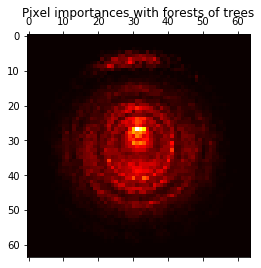

In [16]:
importances = importances.reshape(DIM_IMG, DIM_IMG)
# Plot pixel importances
plt.matshow(importances, cmap=plt.cm.hot)
plt.title("Pixel importances with forests of trees")
plt.show()

To calculate the heatmap I used the ExtraTreesClassifier algorithm implemented in the sklearn library using 1000 estimators and max_features == 128.

I made a reshape of the elements of the validation set, and I performed the classifier train. I extracted the feature importances and then I calculated the plot.

The pixels in red are the most relevant features, thus considered by the ExtraTreesClassifier algorithm. 
As we can see the most relevant pixels are at the center of the image, where the differences between the legos are often concentrated.

# your comments:

# Part 5 - Extra point
- if from the report you printed in part 3.a the weighted avg F1 is greater tha 0.85 you get 1 point



<img src="dexter.jpg"/>

In [17]:
print("F1 weighted: " , f1_score(true_classes, predicted_classes, average='weighted'))


F1 weighted:  0.9994122228398009
